###Main Challenge: Tweet Sentiment Analysis
Goal:
Classify tweets into Positive, Neutral, or Negative categories using Machine Learning techniques learned during Cycle-2.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the Dataset

In [3]:
import pandas as pd
file_path = '/content/drive/MyDrive/training.1600000.processed.noemoticon.csv'
df = pd.read_csv(file_path, encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = df[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


Task 1: Data Cleaning

In [13]:
import re
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+", '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet
df['clean_text'] = df['text'].apply(clean_tweet)
df[['text', 'clean_text']].head()
# converted the tweet to lowercase for uniformity.
# removed URLs
# removed punctuation marks and numbers.
# stripped extra whitespaces to clean up the text.

,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david carr of...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


Task 2: Label Mapping

In [5]:
def map_sentiment(val):
    if val == 0:
        return 'Negative'
    elif val == 2:
        return 'Neutral'
    else:
        return 'Positive'
df['sentiment'] = df['target'].apply(map_sentiment)
df['sentiment'].value_counts()

,count
sentiment,
Negative,800000
Positive,800000


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Task 3: Feature Extraction (TF-IDF)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']
X.shape

(1600000, 5000)

Task 4: Model Building

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Task 5: Model Evaluation

Accuracy: 0.773665625


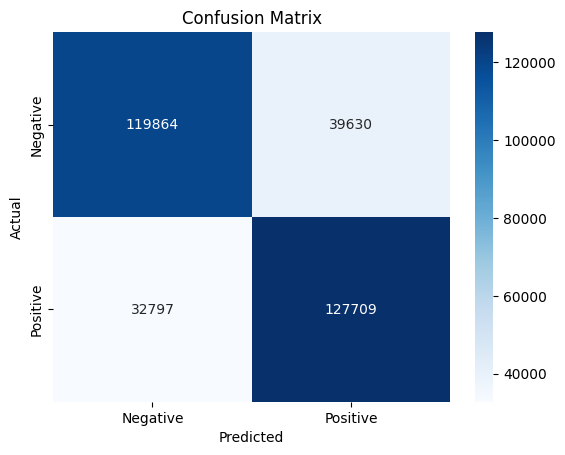

Classification Report:
               precision    recall  f1-score   support

    Negative       0.79      0.75      0.77    159494
    Positive       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Classification Report:\n", classification_report(y_test, y_pred))

#Summary

##  Model Used:
**Logistic Regression** was chosen due to its:
- Simplicity
- Speed
- Effectiveness for text classification problems

---

## Feature Extraction:
Used **TF-IDF Vectorizer** on cleaned tweets:
- Top 5000 words as vocabulary
- English stopwords removed
- Output shape: (1,600,000 tweets × 5,000 features)

---

## Accuracy:
- **Accuracy on test set:** 77.36%

---

##  Confusion Matrix:
|                | Predicted Negative | Predicted Positive |
|----------------|--------------------|--------------------|
| Actual Negative| 119,864            | 39,630             |
| Actual Positive| 32,797             | 127,709            |

---

##  Classification Report:

| Sentiment | Precision | Recall | F1-Score | Support   |
|-----------|-----------|--------|----------|-----------|
| Negative  | 0.79      | 0.75   | 0.77     | 159,494   |
| Positive  | 0.76      | 0.80   | 0.78     | 160,506   |

---

## Challenges Faced:
- Large dataset size (1.6M tweets) required time to process.
- Neutral class was missing, so it became a **binary classification** task.

---

##  How TF-IDF Helped:
- Captured the **importance of each word** across tweets.
- Reduced noise by ignoring common stopwords.
- Improved model generalization by limiting vocabulary size.

---
